In [55]:
from sklearn import datasets, metrics, linear_model
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.model_selection import train_test_split
import os
import numpy as np 
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [298]:
dir_data = '../data/ml100marathon/'
D49_train = os.path.join(dir_data, 'train_data.csv')
D49_test_features = os.path.join(dir_data, 'test_features.csv')
# D49_sample_submission = os.path.join(dir_data, 'sample_submission.csv')


train = pd.read_csv(D49_train)
# sample = pd.read_csv(D49_sample_submission)

In [299]:
train.dtypes.value_counts()

float64    19
object      2
bool        1
dtype: int64

In [300]:
train.head()

,name,bonus,deferral_payments,deferred_income,director_fees,email_address,exercised_stock_options,expenses,from_messages,from_poi_to_this_person,...,long_term_incentive,other,poi,restricted_stock,restricted_stock_deferred,salary,shared_receipt_with_poi,to_messages,total_payments,total_stock_value
0,RICE KENNETH D,1750000.0,NaN,-3504386.0,NaN,ken.rice@enron.com,19794175.0,46950.0,18.0,42.0,...,1617011.0,174839.0,True,2748364.0,NaN,420636.0,864.0,905.0,505050.0,22542539.0
1,SKILLING JEFFREY K,5600000.0,NaN,NaN,NaN,jeff.skilling@enron.com,19250000.0,29336.0,108.0,88.0,...,1920000.0,22122.0,True,6843672.0,NaN,1111258.0,2042.0,3627.0,8682716.0,26093672.0
2,SHELBY REX,200000.0,NaN,-4167.0,NaN,rex.shelby@enron.com,1624396.0,22884.0,39.0,13.0,...,NaN,1573324.0,True,869220.0,NaN,211844.0,91.0,225.0,2003885.0,2493616.0
3,KOPPER MICHAEL J,800000.0,NaN,NaN,NaN,michael.kopper@enron.com,NaN,118134.0,NaN,NaN,...,602671.0,907502.0,True,985032.0,NaN,224305.0,NaN,NaN,2652612.0,985032.0
4,CALGER CHRISTOPHER F,1250000.0,NaN,-262500.0,NaN,christopher.calger@enron.com,NaN,35818.0,144.0,199.0,...,375304.0,486.0,True,126027.0,NaN,240189.0,2188.0,2598.0,1639297.0,126027.0


In [301]:
train.columns

Index(['name', 'bonus', 'deferral_payments', 'deferred_income',
       'director_fees', 'email_address', 'exercised_stock_options', 'expenses',
       'from_messages', 'from_poi_to_this_person', 'from_this_person_to_poi',
       'loan_advances', 'long_term_incentive', 'other', 'poi',
       'restricted_stock', 'restricted_stock_deferred', 'salary',
       'shared_receipt_with_poi', 'to_messages', 'total_payments',
       'total_stock_value'],
      dtype='object')

In [302]:
train['total_stock_value'].describe()

count    9.800000e+01
mean     3.527136e+06
std      7.182997e+06
min     -4.409300e+04
25%      4.211518e+05
50%      9.979710e+05
75%      2.493616e+06
max      4.911008e+07
Name: total_stock_value, dtype: float64

In [303]:
print("{:.10f}".format(min(train['total_stock_value'])))
print("{:.10f}".format(max(train['total_stock_value'])))

-44093.0000000000
49110078.0000000000


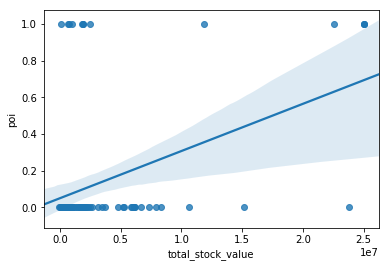

In [304]:
train['total_stock_value'] = train['total_stock_value'].clip(-50000, 25000000)
sns.regplot(x = train['total_stock_value'], y=train["poi"])
plt.show()

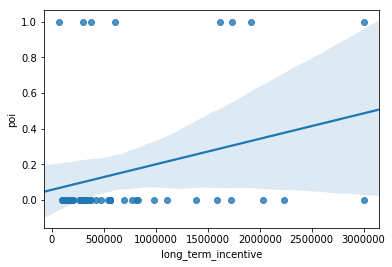

In [305]:
train['long_term_incentive'] = train['long_term_incentive'].clip(0, 3000000)
sns.regplot(x = train['long_term_incentive'], y=train["poi"])
plt.show()

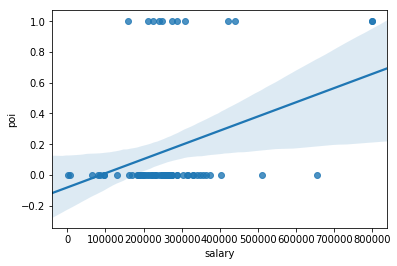

In [306]:
train['salary'] = train['salary'].clip(1000, 800000)
sns.regplot(x = train['salary'], y=train["poi"])
# plt.show()

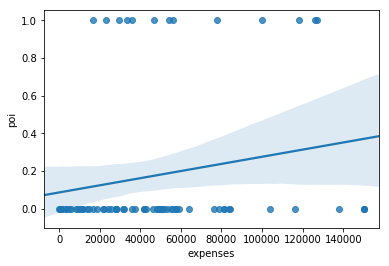

In [307]:
train['expenses'] = train['expenses'].clip(0, 150000)
sns.regplot(x = train['expenses'], y=train["poi"])
# plt.show()

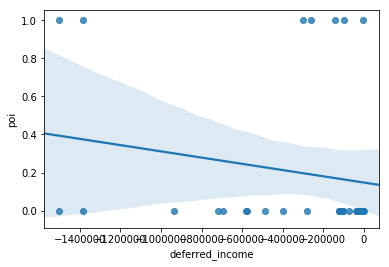

In [308]:
train['deferred_income'] = train['deferred_income'].clip(-2000, -1500000)
sns.regplot(x = train['deferred_income'], y=train["poi"])
# plt.show()

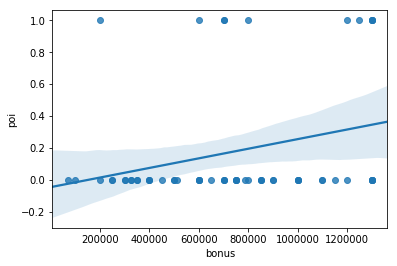

In [309]:
train['bonus'] = train['bonus'].clip(0, 1300000)
sns.regplot(x = train['bonus'], y=train["poi"])
# plt.show()

In [310]:
# train[train["poi"] == True]

In [311]:
tmp = train.pop("name")
tmp = train.pop("email_address")

In [312]:
# train.dtypes.value_counts()

In [313]:
train["from_this_person_to_poi"].replace(np.NaN, 0, inplace=True)
train["from_poi_to_this_person"].replace(np.NaN, 0, inplace=True)

In [314]:
# print(train.columns)
# print(train.select_dtypes(include=["float"]).columns)
# print(np.median(train[~train["bonus"].isnull()]["bonus"]))
for column in train.select_dtypes(include=["float"]).columns:
    print(column)
    train[column].replace(np.NaN, np.median(train[~train[column].isnull()][column]), inplace=True)


bonus
deferral_payments
deferred_income
director_fees
exercised_stock_options
expenses
from_messages
from_poi_to_this_person
from_this_person_to_poi
loan_advances
long_term_incentive
other
restricted_stock
restricted_stock_deferred
salary
shared_receipt_with_poi
to_messages
total_payments
total_stock_value


In [315]:
# for column in train.columns:
#     print(column, train[column].isnull().sum())
#     break

In [316]:
target = train.pop("poi")
x_train, x_test, y_train, y_test = train_test_split(train, target, test_size=0.25, random_state=4)

In [284]:
DT_regres = DecisionTreeRegressor()
DT_regres.fit(x_train, y_train)
y_pred = DT_regres.predict(x_test)
auc = metrics.roc_auc_score(y_test, y_pred)
print("AUC: ", auc)
print(y_pred)

AUC:  0.75
[0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0.]


In [285]:
liner_reg = linear_model.LinearRegression()
liner_reg.fit(x_train, y_train)
y_pred = liner_reg.predict(x_test)
auc = metrics.roc_auc_score(y_test, y_pred)
print("AUC: ", auc)
print(y_pred)

AUC:  0.7300000000000001
[-0.0457825  -0.11934784  0.06223772 -0.05782594  0.28107222  0.06245284
  2.04622673 -0.01921942  0.04964781  0.10088783 -0.00655835 -0.16269094
  0.01579579  0.37801303  0.10566691  0.12867727  0.26453834  0.35437567
  0.10416063 -0.02659661  0.02650735  0.23954811 -0.02760754 -0.04095215
 -0.01709883 -0.0905705  -0.04953164 -0.02491187  0.21786799]


In [286]:
logi_reg = linear_model.LogisticRegression()
logi_reg.fit(x_train, y_train)
y_pred = logi_reg.predict(x_test)
auc = metrics.roc_auc_score(y_test, y_pred)
print("AUC: ", auc)
print(y_pred)

AUC:  0.625
[False False False False False False  True False False False False False
 False False False False False False False False False False False False
 False False False False False]


In [317]:
lasso_reg = linear_model.Lasso(alpha=1.0)
lasso_reg.fit(x_train, y_train)
y_pred = lasso_reg.predict(x_test)
auc = metrics.roc_auc_score(y_test, y_pred)
print("AUC: ", auc)
print(y_pred)

AUC:  0.7400000000000001
[-3.66291858e-02 -1.16026407e-01  7.16113228e-02 -4.80686019e-02
  2.87706198e-01  1.32804196e-02  2.04883005e+00 -1.99581511e-02
  5.98153652e-02  1.11668362e-01 -6.83761137e-04 -1.52786963e-01
  2.58813908e-02  3.09850436e-01  1.06266955e-01  1.28999519e-01
  2.66221822e-01  3.71671184e-01  1.10368210e-01 -2.47671613e-02
  3.61716651e-02  2.40557673e-01 -1.56482983e-02 -3.37191203e-02
 -2.77791103e-03 -8.55055842e-02  1.13081069e-01  3.40593023e-03
  2.35306622e-01]


/Users/tommy/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


In [288]:
ridge_reg = linear_model.Ridge(alpha=1.0)
ridge_reg.fit(x_train, y_train)
y_pred = ridge_reg.predict(x_test)
auc = metrics.roc_auc_score(y_test, y_pred)
print("AUC: ", auc)
print(y_pred)

AUC:  0.7300000000000001
[-0.04578243 -0.11934771  0.06223781 -0.05782586  0.28107261  0.062452
  2.04622798 -0.01921961  0.04964793  0.10088789 -0.00655842 -0.1626906
  0.01579595  0.37801206  0.10566684  0.1286773   0.26453854  0.35437584
  0.10416077 -0.02659661  0.02650752  0.23954819 -0.02760746 -0.0409522
 -0.01709863 -0.09057044 -0.04952874 -0.02491157  0.21786859]


In [318]:
test = pd.read_csv(D49_test_features)
name = test.pop("name")
tmp = test.pop("email_address")
for column in test.select_dtypes(include=["float"]).columns:
#     print(column)
    test[column].replace(np.NaN, np.median(test[~test[column].isnull()][column]), inplace=True)
for column in train.columns:
    print(column, train[column].isnull().sum())

bonus 0
deferral_payments 0
deferred_income 0
director_fees 0
exercised_stock_options 0
expenses 0
from_messages 0
from_poi_to_this_person 0
from_this_person_to_poi 0
loan_advances 0
long_term_incentive 0
other 0
restricted_stock 0
restricted_stock_deferred 0
salary 0
shared_receipt_with_poi 0
to_messages 0
total_payments 0
total_stock_value 0


In [319]:
pred = lasso_reg.predict(test)
print(pred)

[ 5.76798218e-01  5.68705099e-01  4.47015808e-01  3.90117268e-01
  4.81064845e-01  5.51462980e-01  3.41343655e-01  2.33960944e-01
  2.61177984e-01 -1.45409171e-02  4.99227757e-02  1.67759655e-01
  1.33523454e-01  1.01562697e-01  2.05514575e-01  4.43819128e-01
  4.77879250e-02  5.61501228e-01  6.05578816e-01  1.40665599e-01
  3.20436305e+01  3.01965975e-01  5.40930047e-01  2.95093199e-01
  3.63472818e-01  9.13521190e-02  4.84527876e+00  1.93945843e-01
  2.46744084e-02  1.64110119e-01  1.85057041e-01  3.90014791e-02
  4.59870924e-01]


In [320]:
data = {
    "name" : name
}
data["poi"] = pred
output = pd.DataFrame(data)
output.head()

,name,poi
0,BELDEN TIMOTHY N,0.576798
1,BOWEN JR RAYMOND M,0.568705
2,HANNON KEVIN P,0.447016
3,DELAINEY DAVID W,0.390117
4,CAUSEY RICHARD A,0.481065


In [321]:
value = output["poi"].values
output["poi"] = ( value - min(value) ) / ( max(value) - min(value) )
output["poi"]

0     0.018446
1     0.018193
2     0.014397
3     0.012623
4     0.015460
5     0.017656
6     0.011101
7     0.007752
8     0.008601
9     0.000000
10    0.002011
11    0.005687
12    0.004619
13    0.003622
14    0.006864
15    0.014298
16    0.001944
17    0.017969
18    0.019344
19    0.004841
20    1.000000
21    0.009873
22    0.017327
23    0.009659
24    0.011791
25    0.003303
26    0.151594
27    0.006503
28    0.001223
29    0.005573
30    0.006226
31    0.001670
32    0.014798
Name: poi, dtype: float64

In [322]:
output.to_csv("../data/d49_submit_03.csv", index=False)